# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 594


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1
# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count = set_count + 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "?q=" + city + "&appid=" + weather_api_key + "&units=metric"
    #print(city_url)

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count = record_count + 1

    # Run an API request for each of the cities
    try:
        response = requests.get(city_url).json()
        
        # Parse the JSON and retrieve data
        city_weather = response['weather']

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        
        city_lng = response['coord']['lon']
        
        city_max_temp = response['main']['temp_max']
        
        city_humidity = response['main']['humidity']
        
        city_clouds = response['clouds']['all']
        
        city_wind = response['wind']['speed']
        
        city_country = response['sys']['country']
        
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
        #print(city_data)

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | wailua homesteads
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | hamilton
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | bilibino
Processing Record 6 of Set 1 | wynyard
Processing Record 7 of Set 1 | alofi
Processing Record 8 of Set 1 | pechora
Processing Record 9 of Set 1 | tuapse
Processing Record 10 of Set 1 | safford
Processing Record 11 of Set 1 | waitangi
Processing Record 12 of Set 1 | papao
Processing Record 13 of Set 1 | grytviken
Processing Record 14 of Set 1 | thompson
Processing Record 15 of Set 1 | lebu
Processing Record 16 of Set 1 | ilulissat
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | adamstown
Processing Record 19 of Set 1 | new norfolk
Processing Record 20 of Set 1 | prince rupert
Processing Record 21 of Set 1 | puerto natales
Processing Record 22 of Set 1 | porto franco
Processing Record 23 of Set 1 | ut

Processing Record 34 of Set 4 | kruisfontein
Processing Record 35 of Set 4 | sursk
Processing Record 36 of Set 4 | iskateley
Processing Record 37 of Set 4 | mount pearl
Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | mokhsogollokh
Processing Record 40 of Set 4 | lazaro cardenas
Processing Record 41 of Set 4 | antofagasta
Processing Record 42 of Set 4 | fada n'gourma
Processing Record 43 of Set 4 | basoko
Processing Record 44 of Set 4 | cabedelo
Processing Record 45 of Set 4 | douarnenez
Processing Record 46 of Set 4 | sao joao da barra
Processing Record 47 of Set 4 | wanning
Processing Record 48 of Set 4 | tabou
Processing Record 49 of Set 4 | tirebolu
Processing Record 0 of Set 5 | makokou
Processing Record 1 of Set 5 | zeya
Processing Record 2 of Set 5 | micheweni
Processing Record 3 of Set 5 | argo
Processing Record 4 of Set 5 | broken hill
Processing Record 5 of Set 5 | mios
Processing Record 6 of Set 5 | ayr
Processing Record 7 of Set 5 | ad dawadimi
Proce

Processing Record 24 of Set 8 | dunedin
Processing Record 25 of Set 8 | lethem
Processing Record 26 of Set 8 | tefe
Processing Record 27 of Set 8 | perry
Processing Record 28 of Set 8 | tam ky
Processing Record 29 of Set 8 | amos
Processing Record 30 of Set 8 | zheleznogorsk-ilimskiy
Processing Record 31 of Set 8 | hassi messaoud
Processing Record 32 of Set 8 | san jose
Processing Record 33 of Set 8 | rosa zarate
Processing Record 34 of Set 8 | noshiro
Processing Record 35 of Set 8 | ambon
Processing Record 36 of Set 8 | galliano
Processing Record 37 of Set 8 | nar'yan-mar
Processing Record 38 of Set 8 | torbat-e jam
Processing Record 39 of Set 8 | cao bang
Processing Record 40 of Set 8 | qamdo
Processing Record 41 of Set 8 | axim
Processing Record 42 of Set 8 | brisas de zicatela
Processing Record 43 of Set 8 | chavantes
Processing Record 44 of Set 8 | pacific grove
Processing Record 45 of Set 8 | leava
Processing Record 46 of Set 8 | cabo san lucas
Processing Record 47 of Set 8 | thu

Processing Record 11 of Set 12 | salekhard
Processing Record 12 of Set 12 | mana
Processing Record 13 of Set 12 | port douglas
Processing Record 14 of Set 12 | rampur
Processing Record 15 of Set 12 | happy valley-goose bay
Processing Record 16 of Set 12 | bolobo
Processing Record 17 of Set 12 | greeley
Processing Record 18 of Set 12 | massakory
Processing Record 19 of Set 12 | sironko
Processing Record 20 of Set 12 | sassandra
Processing Record 21 of Set 12 | kone
Processing Record 22 of Set 12 | verkhnevilyuysk
Processing Record 23 of Set 12 | mossel bay
Processing Record 24 of Set 12 | oranjemund
Processing Record 25 of Set 12 | vingt cinq
City not found. Skipping...
Processing Record 26 of Set 12 | nguigmi
Processing Record 27 of Set 12 | san ignacio de velasco
Processing Record 28 of Set 12 | ingeniero jacobacci
Processing Record 29 of Set 12 | baise city
Processing Record 30 of Set 12 | dalbandin
Processing Record 31 of Set 12 | 'izbat al burj
City not found. Skipping...
Processin

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          561
Lat           561
Lng           561
Max Temp      561
Humidity      561
Cloudiness    561
Wind Speed    561
Country       561
Date          561
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,wailua homesteads,22.0669,-159.3780,22.64,91,100,4.12,US,1697300478
1,bredasdorp,-34.5322,20.0403,16.41,78,83,9.67,ZA,1697300479
2,hamilton,39.1834,-84.5333,17.10,81,100,6.17,US,1697300214
3,badger,64.8000,-147.5333,-2.02,88,100,1.54,US,1697300016
4,bilibino,68.0546,166.4372,-10.58,97,100,0.98,RU,1697299995


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.64,91,100,4.12,US,1697300478
1,bredasdorp,-34.5322,20.0403,16.41,78,83,9.67,ZA,1697300479
2,hamilton,39.1834,-84.5333,17.10,81,100,6.17,US,1697300214
3,badger,64.8000,-147.5333,-2.02,88,100,1.54,US,1697300016
4,bilibino,68.0546,166.4372,-10.58,97,100,0.98,RU,1697299995


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

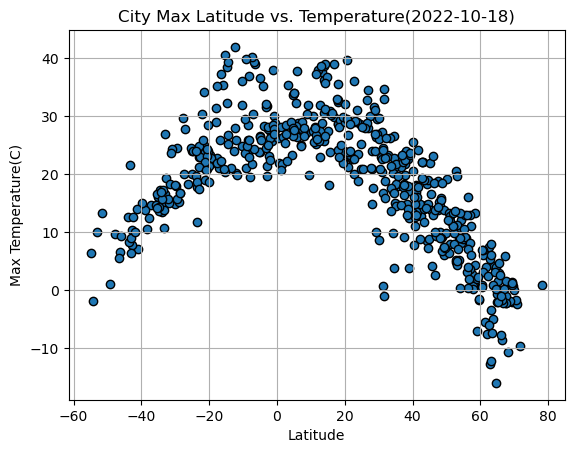

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Max Temp"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title("City Max Latitude vs. Temperature(2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

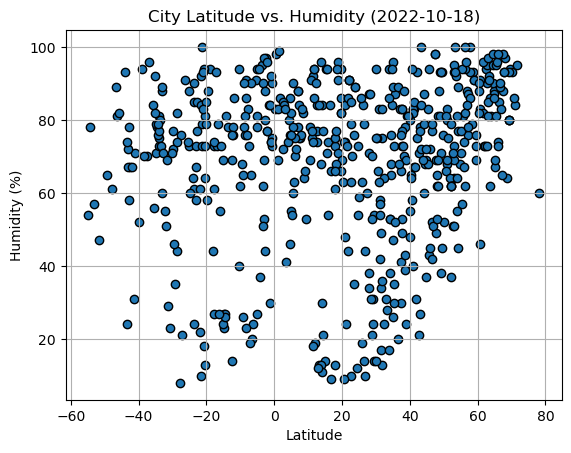

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Humidity"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

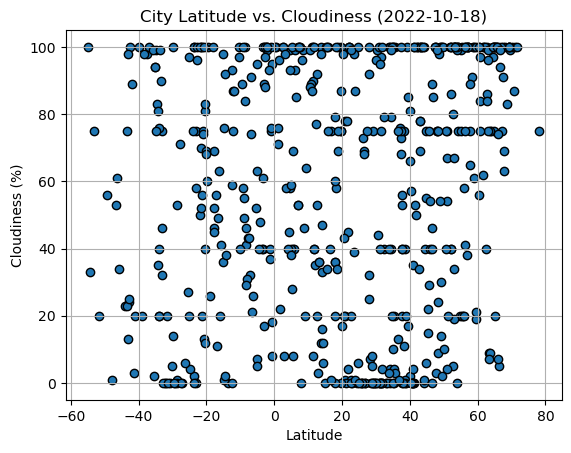

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

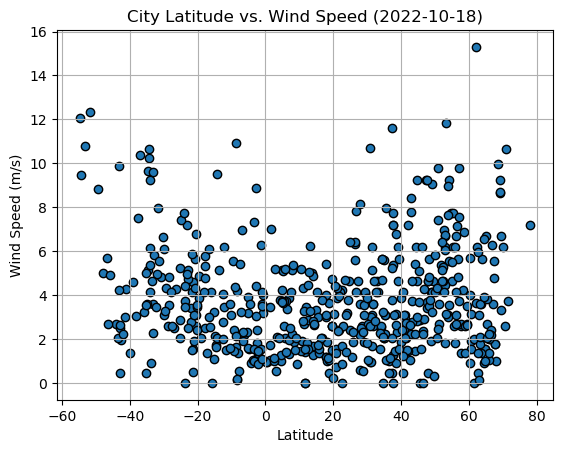

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis = city_data_df["Lat"]
y_axis = city_data_df["Wind Speed"]
plt.scatter(x_axis, y_axis, marker="o", edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed (2022-10-18)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_axis, y_axis, x_axis_label, y_axis_label, annotation_x, annotation_y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)

    # finding regress values
    regress_values = x_axis * slope + intercept

    #print("The correlation between mouse weight and the average tumor volume is " + str(round(rvalue,2)))

    #line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    #Scatter plot
    plt.scatter(x_axis,y_axis)
    plt.plot(x_axis,regress_values,"r-")
    plt.annotate(line_eq,(annotation_x,annotation_y),fontsize=15,color="red")
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    print("The r-value is:" + str(rvalue))
    plt.show()
    

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,wailua homesteads,22.0669,-159.3780,22.64,91,100,4.12,US,1697300478
2,hamilton,39.1834,-84.5333,17.10,81,100,6.17,US,1697300214
3,badger,64.8000,-147.5333,-2.02,88,100,1.54,US,1697300016
4,bilibino,68.0546,166.4372,-10.58,97,100,0.98,RU,1697299995
7,pechora,65.1472,57.2244,1.59,67,100,6.71,RU,1697300421


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bredasdorp,-34.5322,20.0403,16.41,78,83,9.67,ZA,1697300479
5,wynyard,-41.0000,145.7167,7.19,71,20,4.26,AU,1697300480
6,alofi,-19.0595,-169.9187,21.94,94,26,2.06,NU,1697300481
10,waitangi,-43.9535,-176.5597,12.68,93,23,2.68,NZ,1697300482
11,papao,-17.7500,-149.5500,22.82,73,69,5.80,PF,1697300483


###  Temperature vs. Latitude Linear Regression Plot

The r-value is:-0.8628169575262908


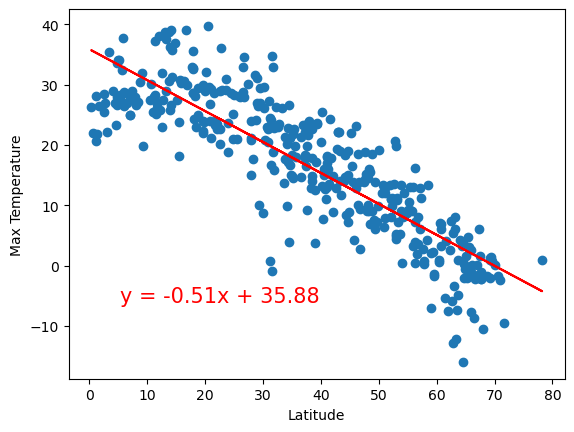

In [15]:
# Linear regression on Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Max Temp"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Max Temperature", x_axis.min() + 5, y_axis.min() + 10)


The r-value is:0.7672706613136299


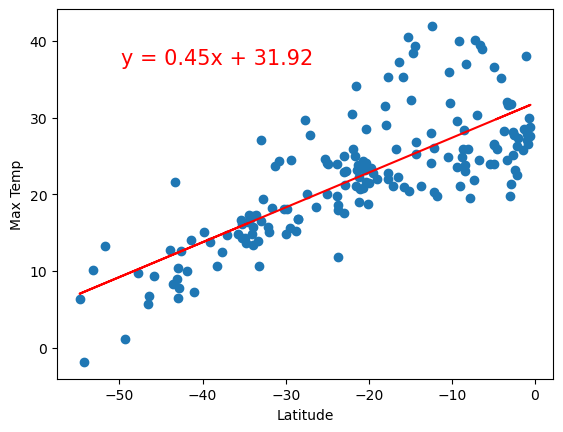

In [16]:
# Linear regression on Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Max Temp"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Max Temp", x_axis.min() + 5, y_axis.max() - 5)

**Discussion about the linear relationship:** For Northern Hemisphere, the r-value -0.8628169575262908 indicates a very strong negative linear association between Latitude and Max Temperature. There is an inverse relationship between latitude and the maximum temperature. Since correlation coefficeient is negative, it means that as you move towards higher latitudes, you can expect the temperature to decrease.

For Southern Hemisphere, the r-value 0.7672706613136299 indicates a strong positive linear association between Latitude and Max Temperature. There is an positive correlation between latitude and the maximum temperature. It means that as you move towards higher latitudes, you can expect the temperature to increase.

### Humidity vs. Latitude Linear Regression Plot

The r-value is:0.2198234230858809


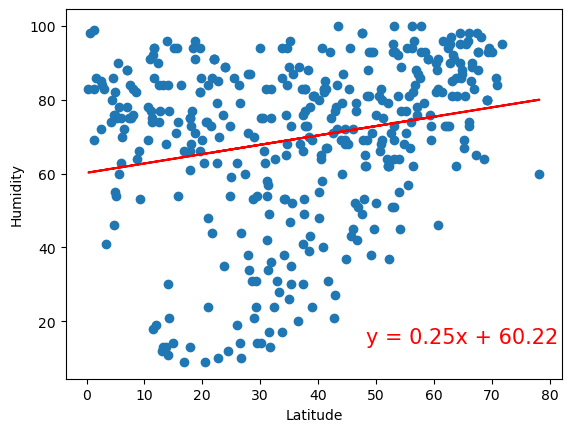

In [17]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Humidity"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Humidity", x_axis.max() - 30, y_axis.min() + 5)

The r-value is:0.022560879024191894


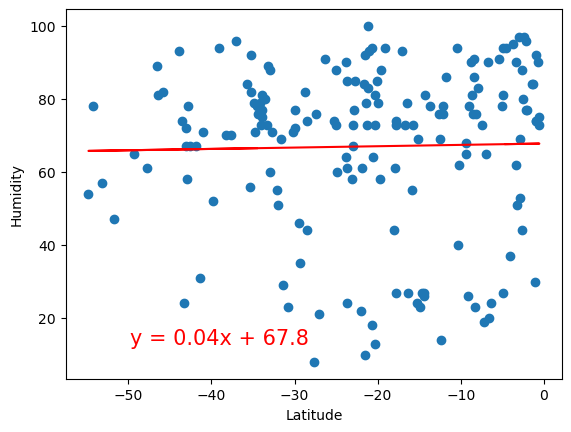

In [18]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Humidity"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Humidity", x_axis.min() + 5, y_axis.min() + 5)

**Discussion about the linear relationship:** In Northern Hemisphere, Humidity has weak positive correlation with Latitude. In other words, there is little relationship between latitude and humidity and latitude is not reliable to predict humidity.

In southern hemisphere, Humidity has close to zero correlation (positive) with Latitude. This means that the correlation is very weak or does not exist and latitude cannot be reliably used to predict humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is:0.18349608595123798


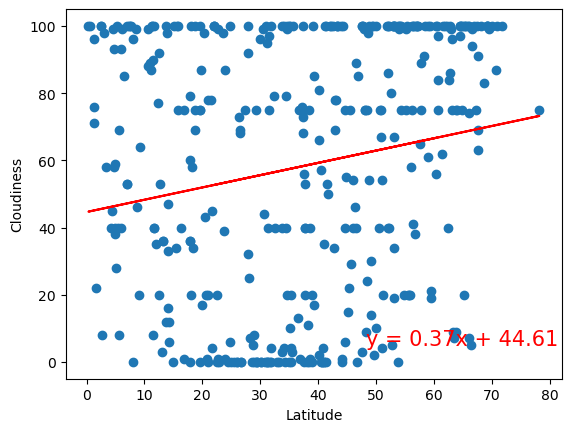

In [19]:
# Northern Hemisphere
x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Cloudiness", x_axis.max() - 30, y_axis.min() + 5)

The r-value is:0.14739108920497207


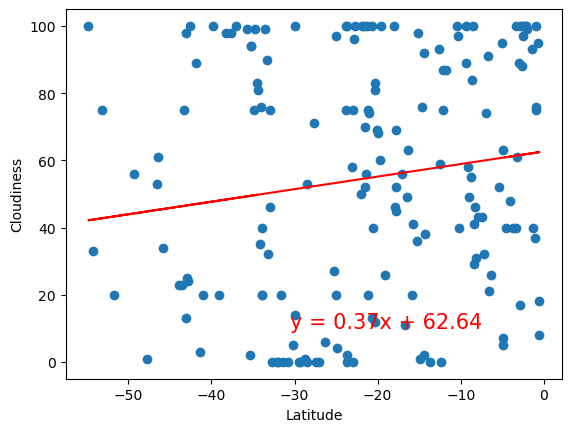

In [20]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Cloudiness"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Cloudiness", x_axis.max() - 30, y_axis.min() + 10)

**Discussion about the linear relationship:** For both Northern and southern hemisphere, cloudiness has very weak positive corrlation with Latitude. This means that, cloudiness increase slightly with higher latitudes but weak association imples that there is significant amount of variability and there may be other factors impacting cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is:0.2565891642010107


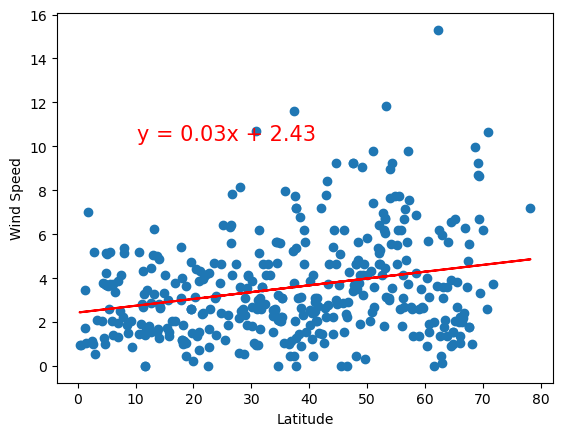

In [21]:
# Northern Hemisphere

x_axis = northern_hemi_df["Lat"]
y_axis = northern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Wind Speed", x_axis.min() + 10, y_axis.max() - 5)

The r-value is:-0.3951162345254541


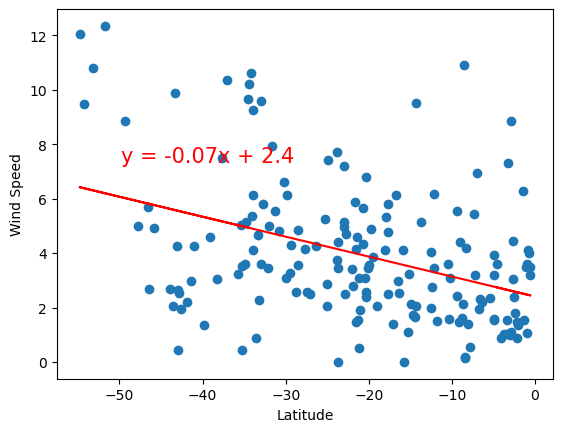

In [22]:
# Southern Hemisphere
x_axis = southern_hemi_df["Lat"]
y_axis = southern_hemi_df["Wind Speed"]

plot_linear_regression(x_axis, y_axis, "Latitude", "Wind Speed", x_axis.min() + 5, y_axis.max() - 5)

**Discussion about the linear relationship:** For Northern Hemisphere, there is weak positive correlation between Wind Speed and latitude. This means that with increase in latitude, there is slight increase in wind speed. Low r value indicates that data has variability and may not be only factor contributing to the wind speed.

For Southern Hemisphere, there is moderate negative association between wind speed and latitude. This means there is a tendency of reduction in wind speed as we move up to higher latitudes. Although is there is still variability in the data and hence not very reliable. Factors other than latitude may also impact the wind speed.